# 1 Plot One Variable 
You'll learn how to: <br>
- Visualize a categorical variable using **bar plots**, **dot charts** and **pie charts** <br>
- Visualize the distribution of a continuous variable using: <br>
&ensp;&ensp;&ensp;&ensp; - **density** and **histogram plots**, <br>
&ensp;&ensp;&ensp;&ensp; - other alternatives, such as **frequency polygon**, **area plots**, **dot plots**, **box plots**, <br> &ensp;&ensp;&ensp;&ensp;&ensp; **Empirical cumulative distribution (ECDF)** and **Quantile-quantile plot (QQ plots)**. <br> &ensp;&ensp;&ensp;&ensp; - **Density ridgeline plots**, which are useful for visualizing changes in distributions, of a continuous variable, over time or space. <br> &ensp;&ensp;&ensp;&ensp; - **Bar plot** and modern alternatives, including **lollipop charts** and **cleveland's dot plots**. 

## 1.1 Prerequisites

In [2]:
# Load required packages
library(ggplot2)
library(ggpubr)

# Set the theme function theme_pubr() [in ggpubr] as the default theme
theme_set(theme_pubr())

## 1.2 One categorical variable

### 1.2.1 Bar plot of counts 

#### Data set

In [6]:
# Print out the first 10 rows of the diamonds [in ggplot2] dataset
head(diamonds, n=10)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


#### Visualization

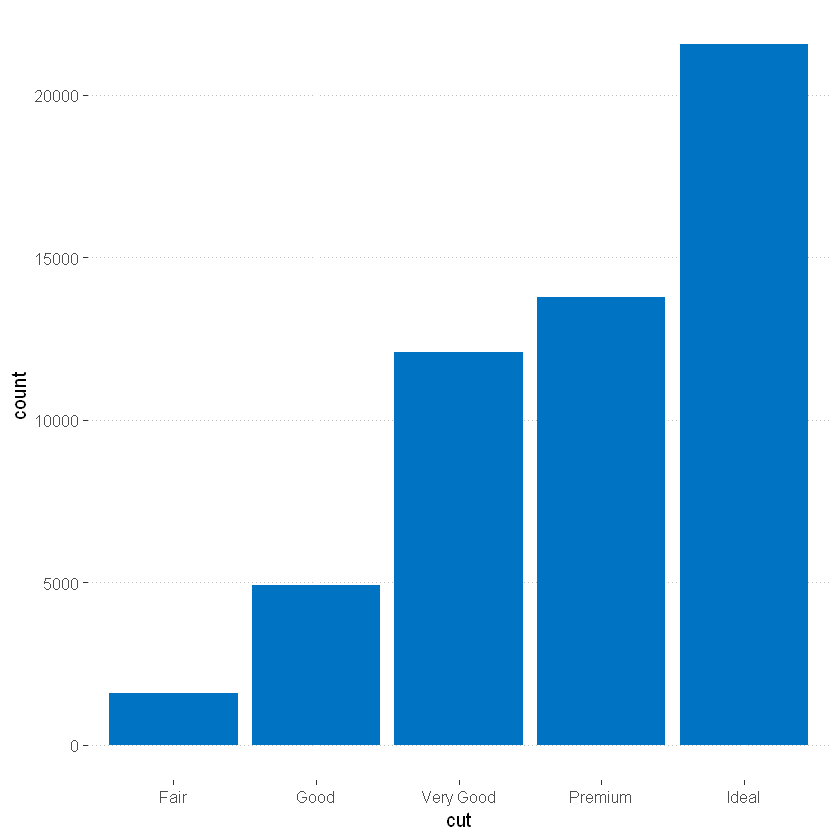

In [10]:
## Create a bar plot of each cut
# Set the plot's theme to theme_pubclean [in ggpubr]
ggplot(diamonds, aes(cut)) +
    geom_bar(fill="#0073C2FF") +
    theme_pubclean()

In [15]:
# Load required package
library(dplyr)

# Compute the frequency for each cut
# Save the results to a variable
df <- diamonds %>% 
    group_by(cut) %>%
    summarise(counts=n())

# Print out the results
df

cut,counts
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


In [15]:
data("iris")        # Load the iris dataset
head(iris, n=3)     # Print the first 3 rows of the iris dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


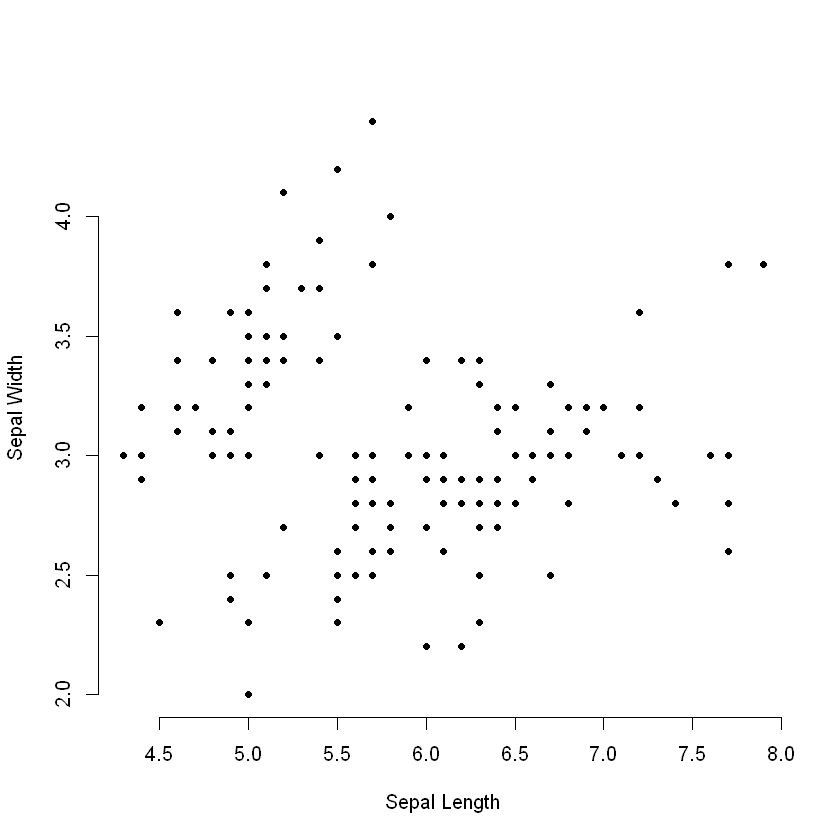

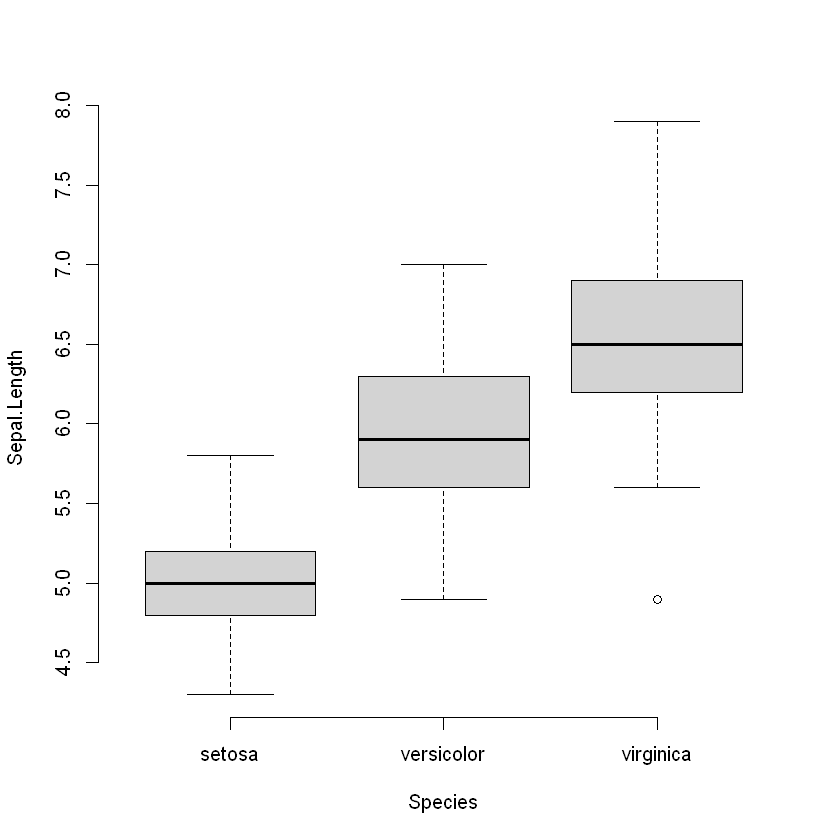

In [16]:
# Create a scatter plot
plot(
    x=iris$Sepal.Length, y=iris$Sepal.Width,
    pch=19, cex=0.8, frame=FALSE,
    xlab="Sepal Length", ylab="Sepal Width"
)

# Create a box plot
boxplot(Sepal.Length~Species, data=iris,
        ylab="Sepal.Length",
        frame=FALSE, col="lightgray")

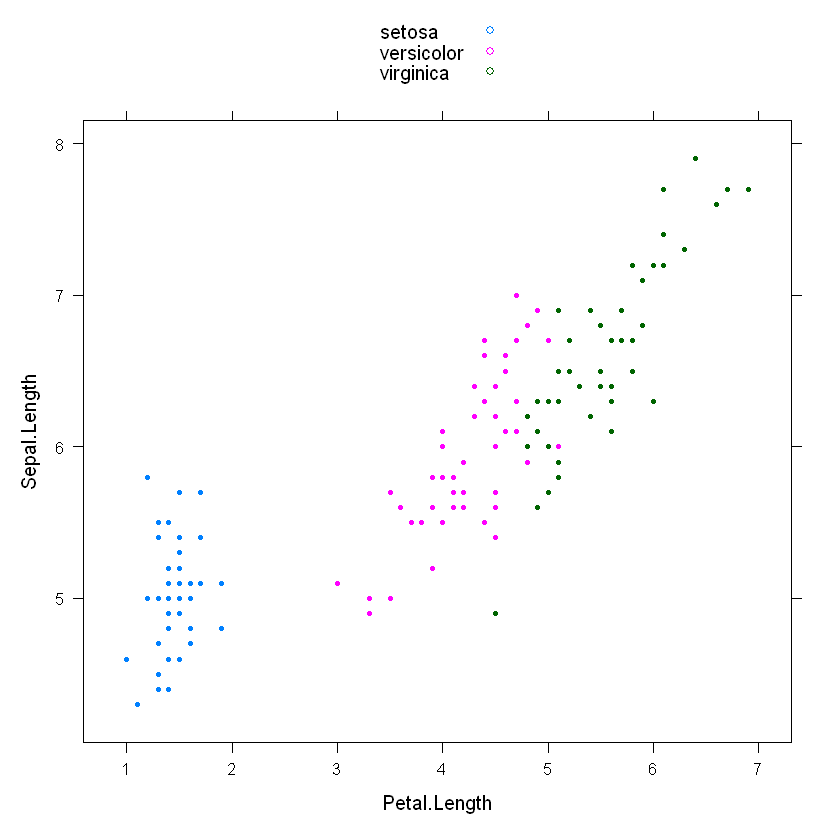

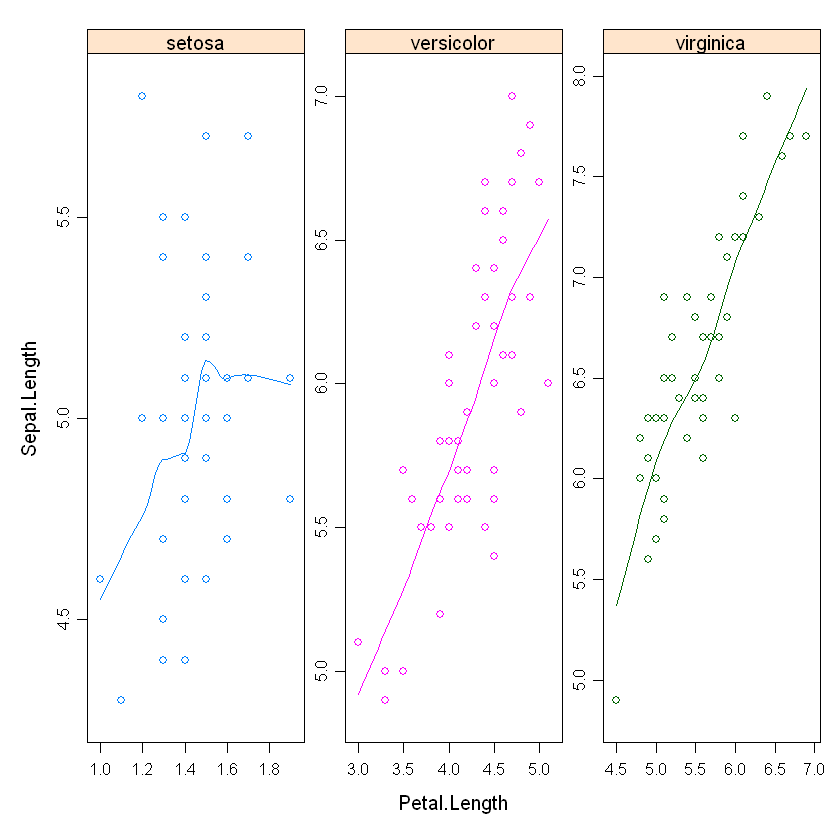

In [17]:
library(lattice)

# Create a scatter plot
xyplot(
    Sepal.Length~Petal.Length, group=Species,
    data=iris, auto.key=TRUE, pch=19, cex=0.5
)

# Turn off warning messages
options(warn=-1)

# Create multiple panel plots
xyplot(
    Sepal.Length~Petal.Length | Species,
    layout=c(3, 1),                        # panel with ncol=3 and nrow=1
    group=Species, data=iris,
    type=c("p", "smooth"),                 # Show points and smoothed line
    scales="free"                          # Make panels axis scales independent
)

# Turn on warning messages
options(warn = 0)

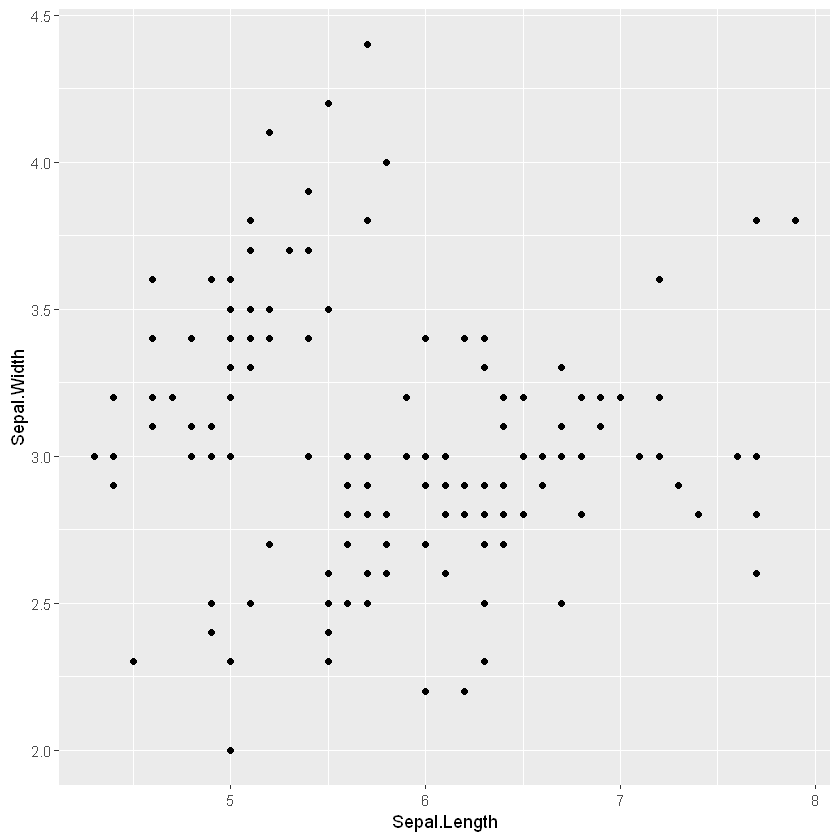

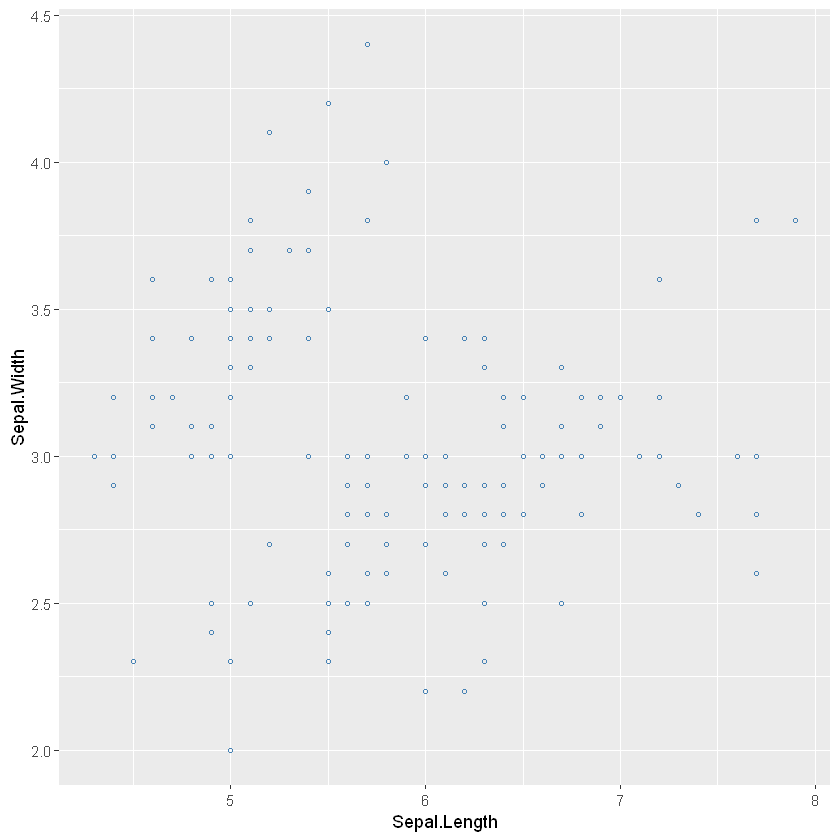

In [18]:
library(ggplot2)

# Create a scatter plot
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point()

# Change point size, color and shape
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point(size=1.2, color="steelblue", shape=21)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



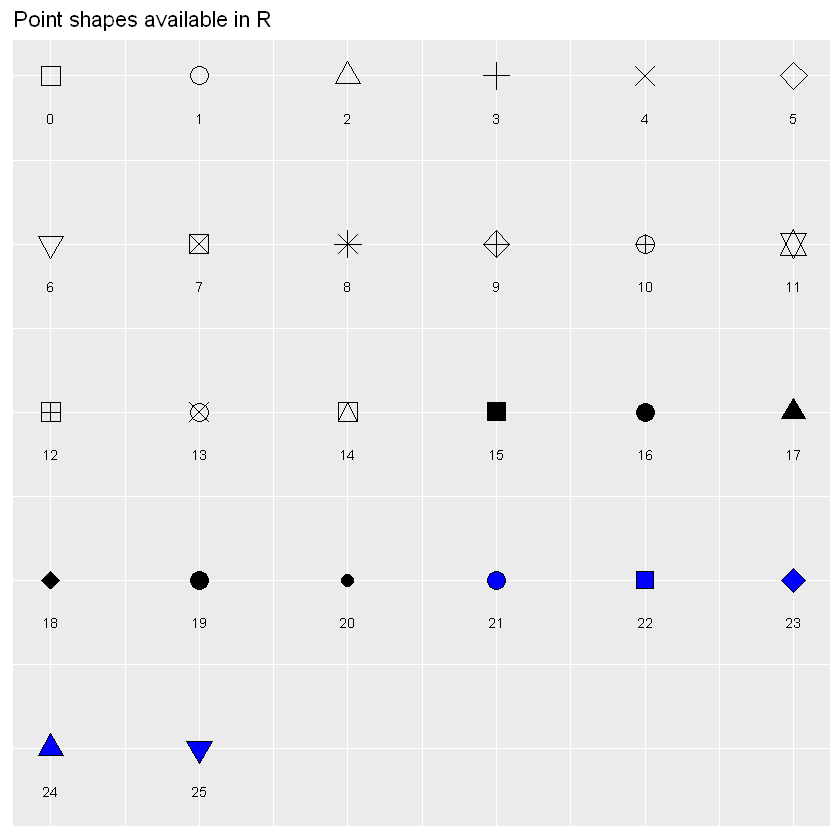

In [19]:
# Display all available point shapes
ggpubr::show_point_shapes()

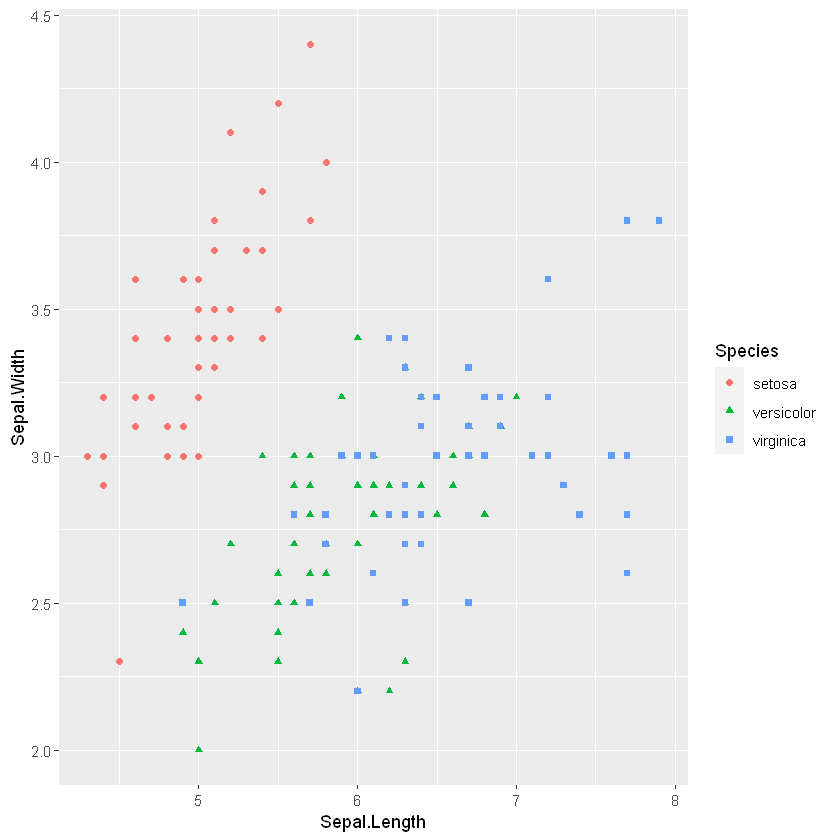

In [20]:
# Control points color by groups
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point(aes(color=Species, shape=Species))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



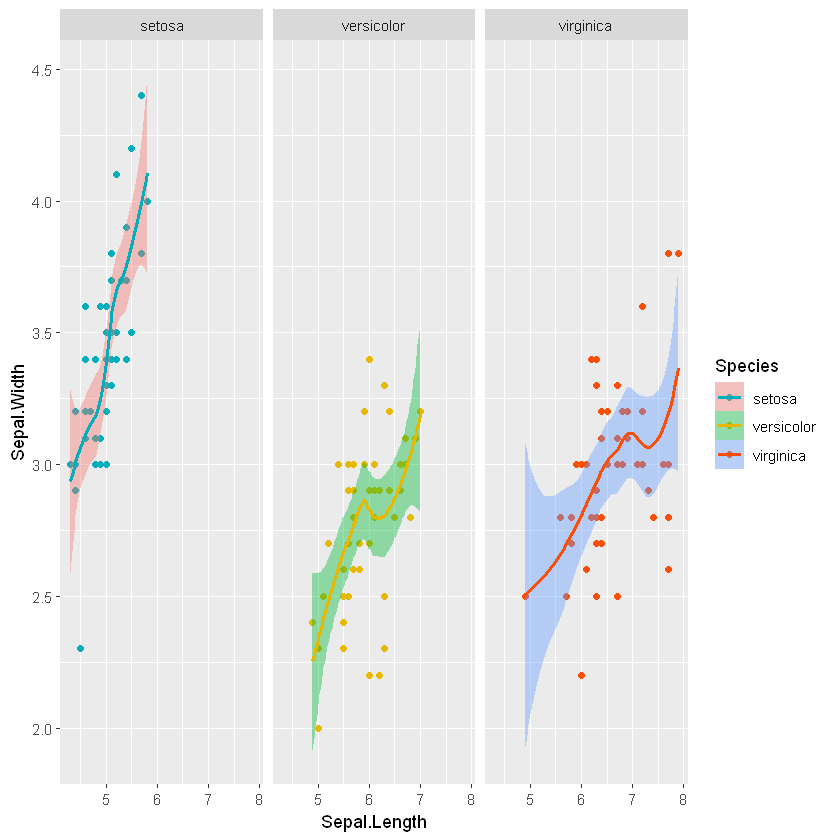

In [24]:
# Change the default color manually
# Use the scale_color_manual() function
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point(aes(color=Species)) +
    geom_smooth(aes(color=Species, fill=Species)) +
    facet_wrap(~Species, ncol=3, nrow=1) +
    scale_color_manual(values=c("#00AFBB", "#E7B800", "#FC4E07"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



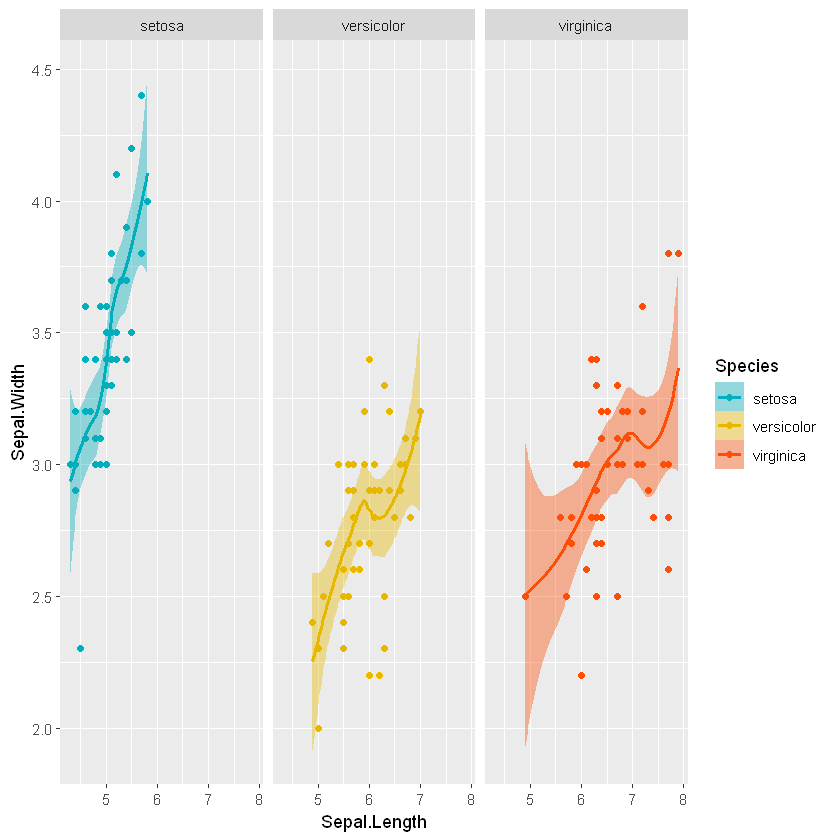

In [26]:
# Create multiple panel plots 
# Add a regression line and confidence interval to each panel
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point(aes(color=Species)) +
    geom_smooth(aes(color=Species, fill=Species)) +
    facet_wrap(~Species, ncol=3, nrow=1) +
    scale_color_manual(values=c("#00AFBB", "#E7B800", "#FC4E07")) +
    scale_fill_manual(values=c("#00AFBB", "#E7B800", "#FC4E07")) 

The default theme of ggplots is **theme_gray()** (or **theme_grey()**), which is theme with grey background and white grid lines. 

You can use **theme_bw()**, **theme_classic()** and **theme_minimal()** for professional presentations or publications

In [29]:
# Change the default theme to theme_classic() 
theme_set(theme_classic())

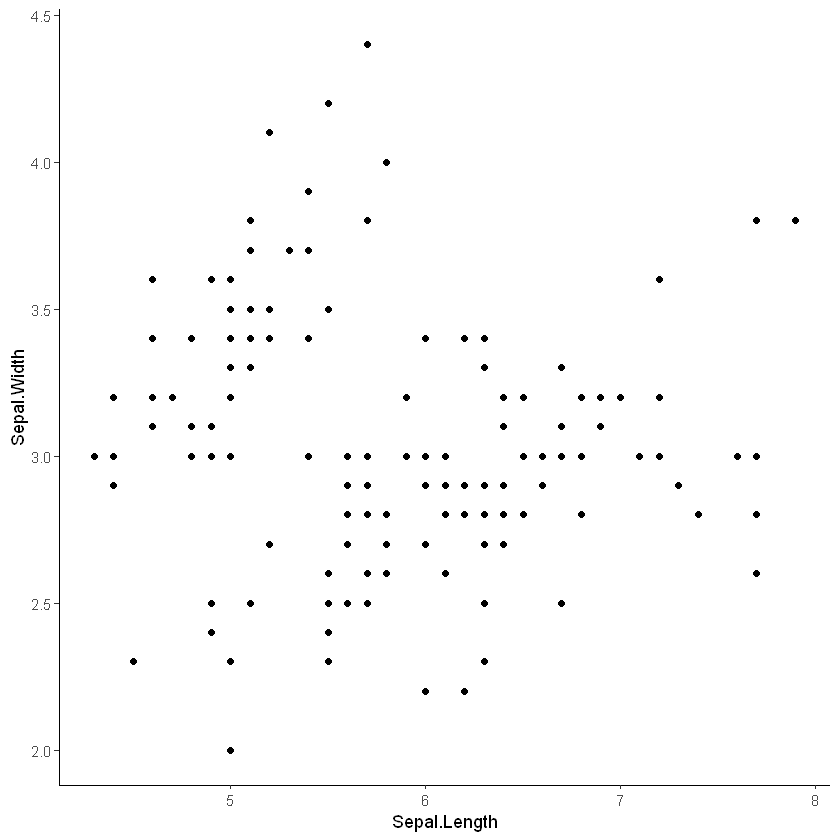

In [31]:
# Create ggplots with theme_classic as the default theme
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) +
    geom_point()

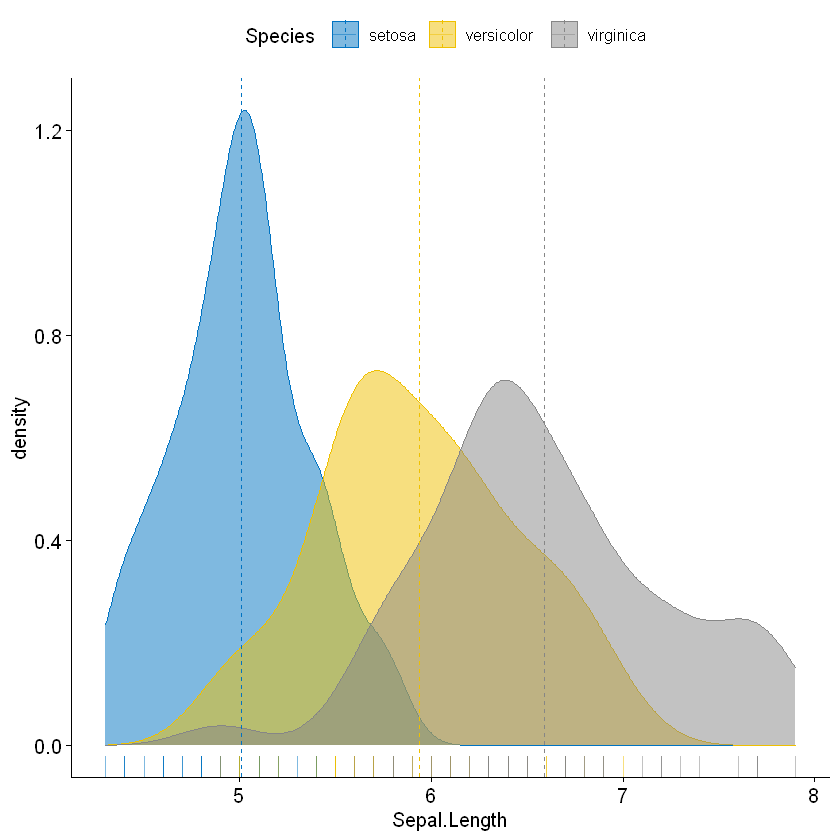

In [33]:
library(ggpubr)

# Density plot with mean lines and marginal rug
ggdensity(iris, x="Sepal.Length",              
         add="mean", rug=TRUE,                 # Add mean line and marginal rugs
         color="Species", fill="Species",      # Color by groups
         palette="jco")                        # Use jco journal color palette

Warning message:
"Computation failed in `stat_signif()`:
not enough 'y' observations"


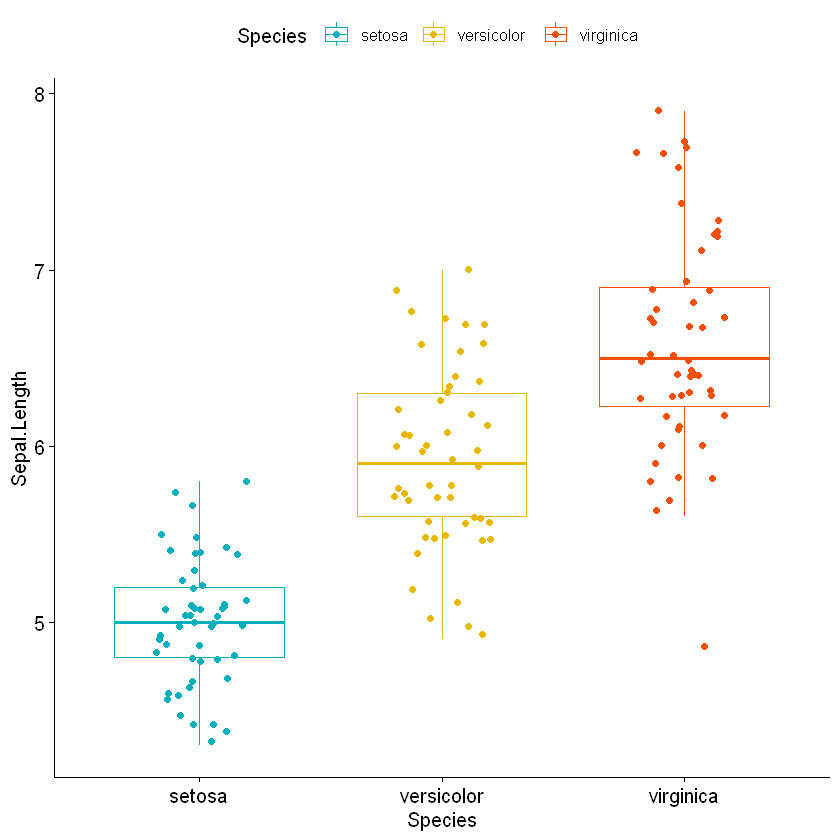

In [35]:
# Groups that we want to compare
my_comparisons <- list(
    c("setosa", "versicolor"), c("versicolor", "virginica"),
    c("setosa", "virgnica")
)

# Create the box plot. Change colors by groups: Species
# Add jitter points and change the shape by groups
ggboxplot(
    iris, x = "Species", y = "Sepal.Length",
    color = "Species", palette = c("#00AFBB", "#E7B800", "#FC4E07"),
    add = "jitter"
    )+
    stat_compare_means(comparisons = my_comparisons, method = "t.test")

In [37]:
library(ggplot2)
library(ggpubr)
theme_set(theme_pubr())

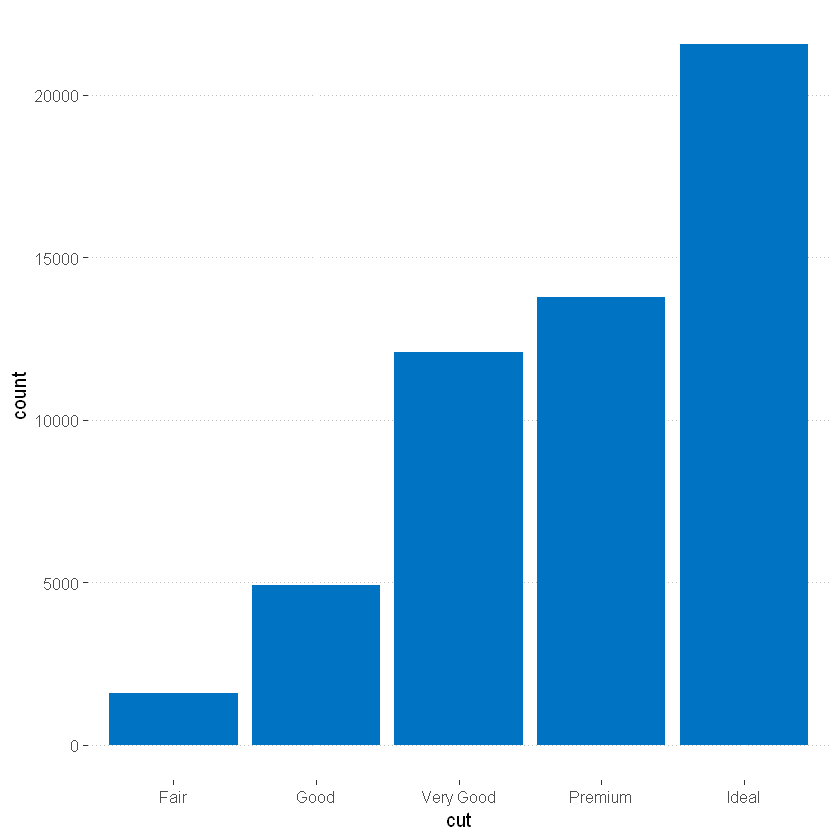

In [39]:
ggplot(diamonds, aes(cut)) +
    geom_bar(fill = "#0073C2FF") +
    theme_pubclean()

In [41]:
# Compute the frequency
library(dplyr)
df <- diamonds %>%
    group_by(cut) %>%
    summarise(counts = n())
df

cut,counts
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


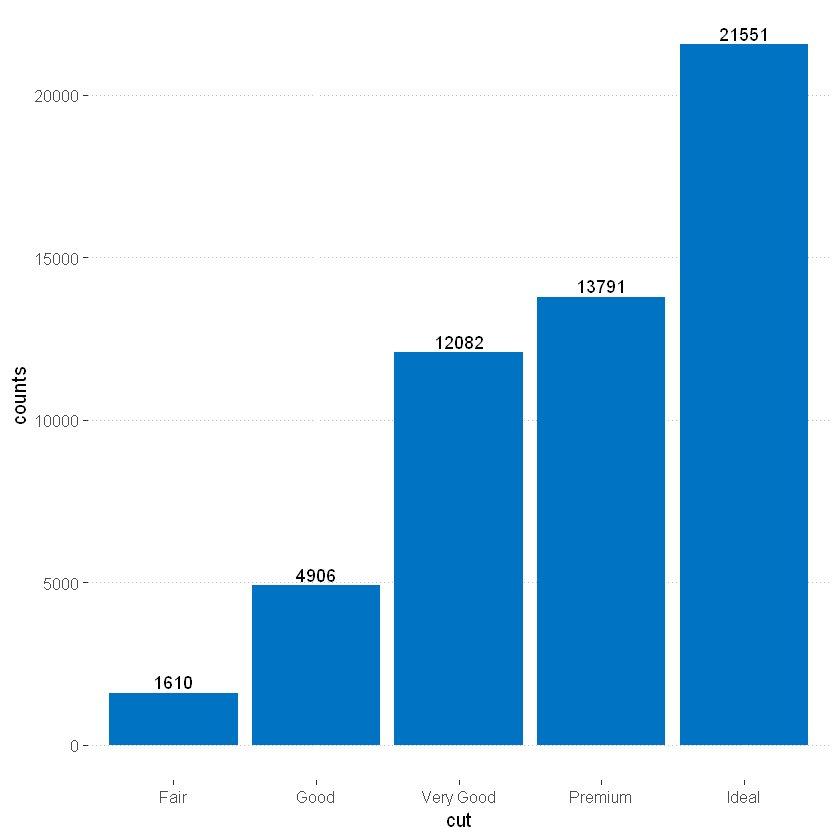

In [43]:
# Create the bar plot. Use theme_pubclean() [in ggpubr]
ggplot(df, aes(x = cut, y = counts)) +
    geom_bar(fill = "#0073C2FF", stat = "identity") +
    geom_text(aes(label = counts), vjust = -0.3) +
    theme_pubclean()

In [45]:
df <- df %>%
    arrange(desc(cut)) %>%
    mutate(prop = round(counts*100/sum(counts), 1),
        lab.ypos = cumsum(prop) - 0.5*prop)
head(df, 4)

cut,counts,prop,lab.ypos
<ord>,<int>,<dbl>,<dbl>
Ideal,21551,40.0,20.00
Premium,13791,25.6,52.80
Very Good,12082,22.4,76.80
Good,4906,9.1,92.55


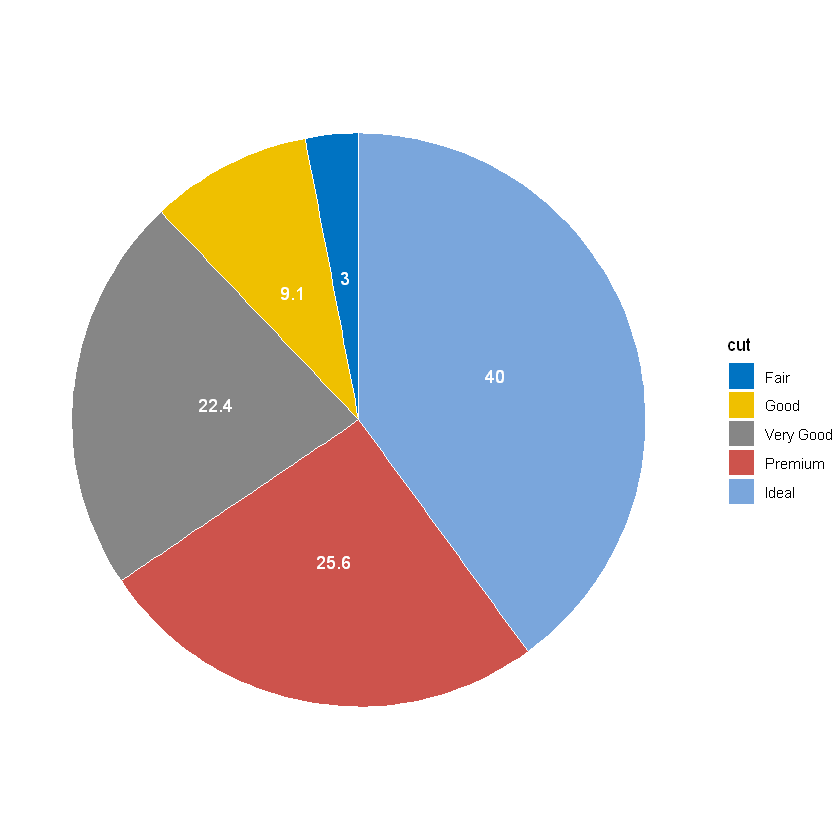

In [47]:
ggplot(df, aes(x = "", y = prop, fill = cut)) +
    geom_bar(width = 1, stat = "identity", color = "white") +
    geom_text(aes(y = lab.ypos, label = prop), color = "white")+
    coord_polar("y", start = 0)+
    ggpubr::fill_palette("jco")+
theme_void()

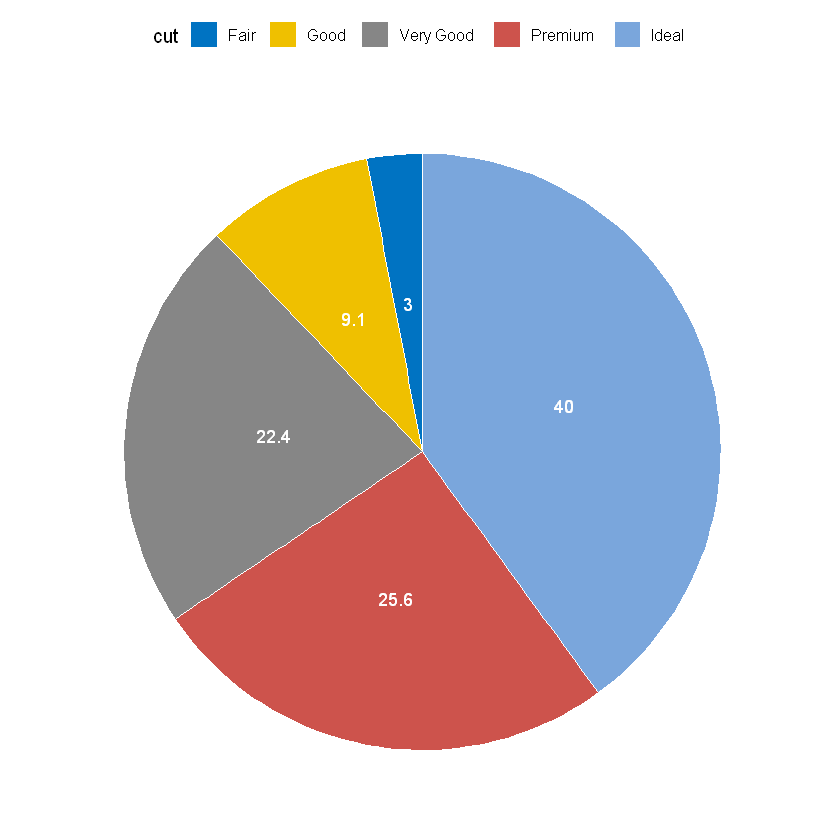

In [49]:
ggpie(
    df, x = "prop", label = "prop",
    lab.pos = "in", lab.font = list(color = "white"),
    fill = "cut", color = "white",
    palette = "jco"
)

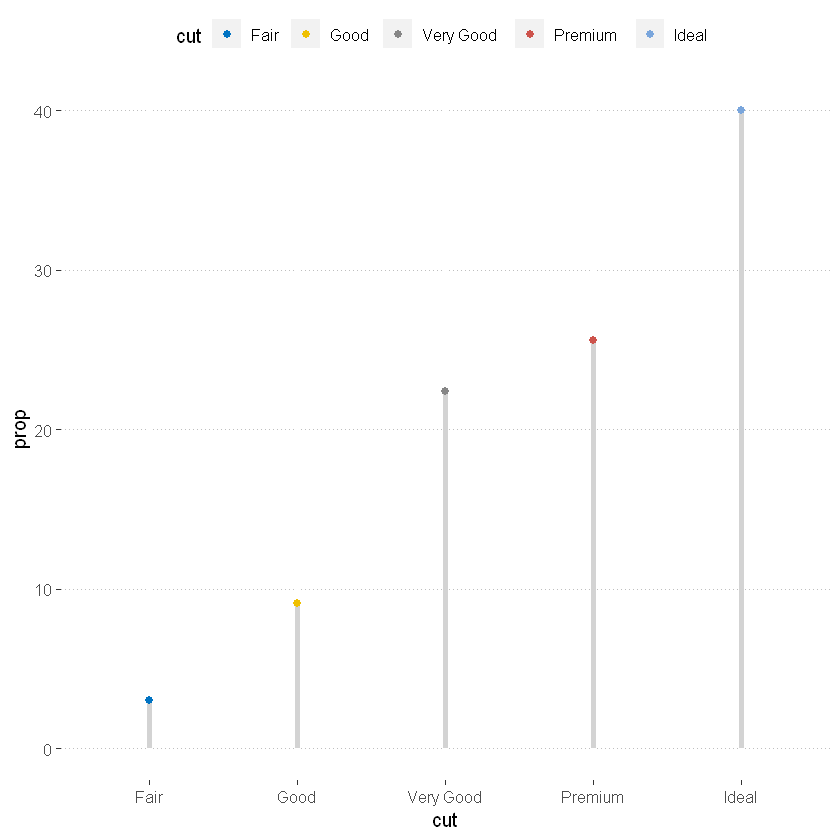

In [51]:
ggplot(df, aes(cut, prop)) +
    geom_linerange(
        aes(x = cut, ymin = 0, ymax = prop),
        color = "lightgray", size = 1.5
        )+
    geom_point(aes(color = cut), size = 2)+
    ggpubr::color_palette("jco")+
    theme_pubclean()

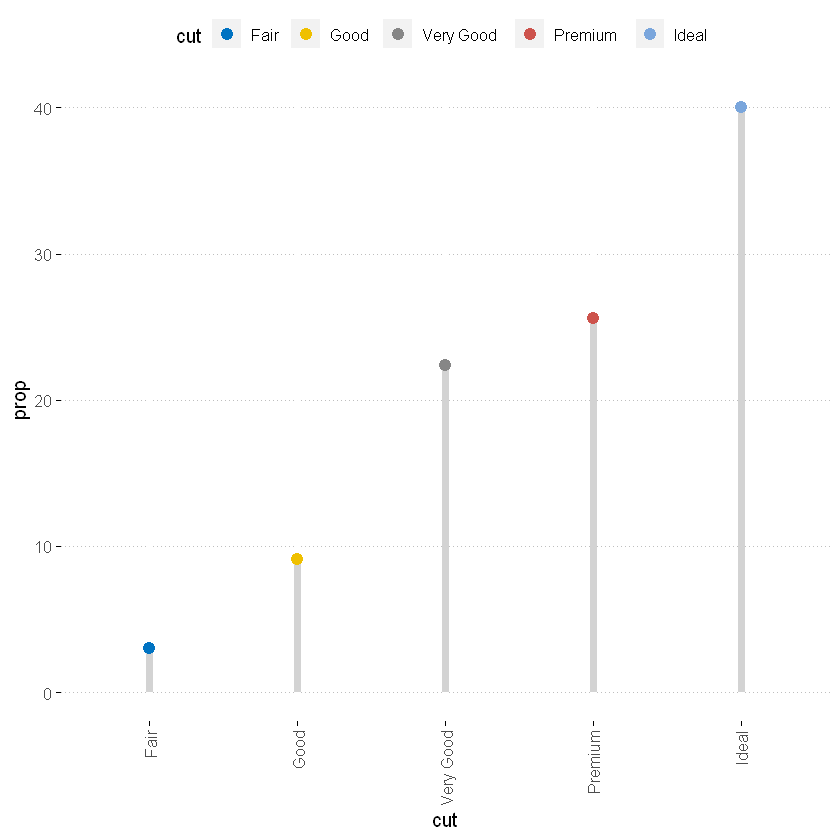

In [53]:
ggdotchart(
    df, x = "cut", y = "prop",
    color = "cut", size = 3,       # Points color and size
    add = "segment",               # Add line segments
    add.params = list(size = 2),
    palette = "jco",
    ggtheme = theme_pubclean()
)

In [54]:
set.seed(1234)
wdata = data.frame(
    sex = factor(rep(c("F", "M"), each=200)),
    weight = c(rnorm(200, 55), rnorm(200, 58))
    )

head(wdata, 4)

,sex,weight
,<fct>,<dbl>
1,F,53.79293
2,F,55.27743
3,F,56.08444
4,F,52.65430


In [55]:
library("dplyr")
mu <- wdata %>%
    group_by(sex) %>%
    summarise(grp.mean = mean(weight))
mu

sex,grp.mean
<fct>,<dbl>
F,54.94224
M,58.07325


In [56]:
a <- ggplot(wdata, aes(x = weight))

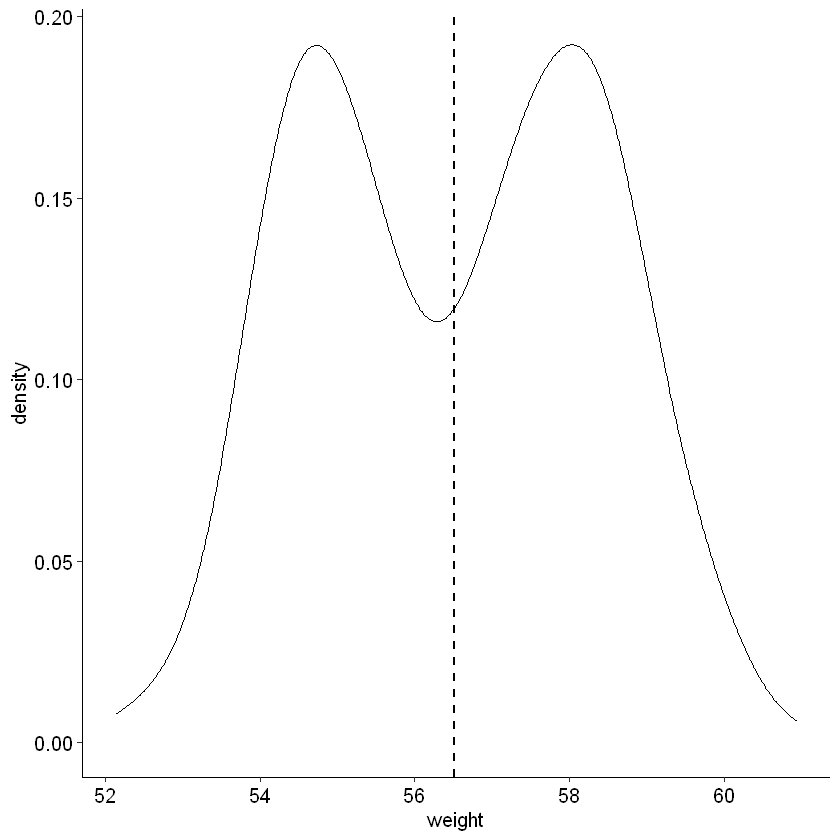

In [57]:
# y axis scale = ..density.. (default behaviour)
a + geom_density() +
geom_vline(aes(xintercept = mean(weight)),
linetype = "dashed", size = 0.6)

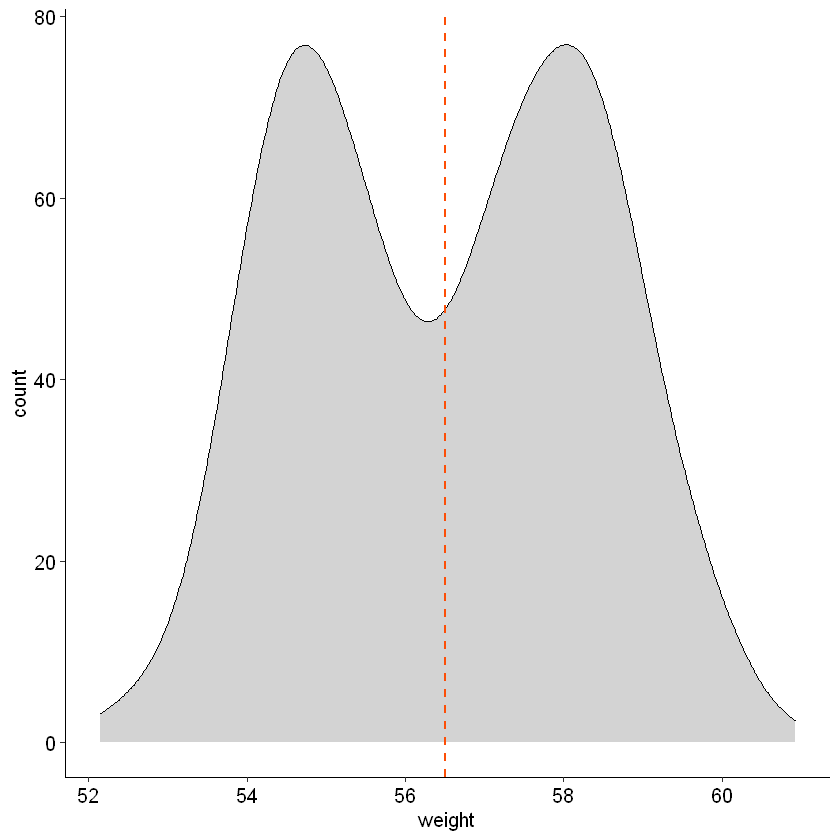

In [58]:
# Change y axis to count instead of density
a + geom_density(aes(y = ..count..), fill = "lightgray") +
geom_vline(aes(xintercept = mean(weight)),
linetype = "dashed", size = 0.6,
color = "#FC4E07")

In [59]:
sp <- ggplot(data = mtcars, aes(x = wt, y = mpg)) +
    geom_point()+theme_bw()

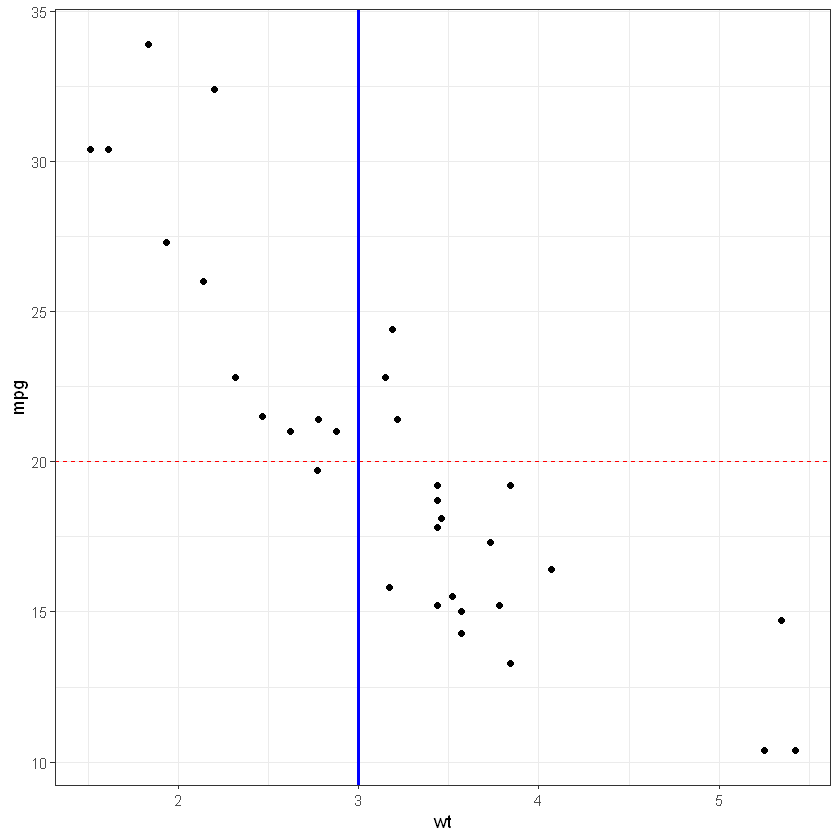

In [60]:
# Add horizontal line at y = 2O; and vertical line at x = 3
sp + geom_hline(yintercept = 20, linetype = "dashed", color = "red") +
    geom_vline(xintercept = 3, color = "blue", size = 1)

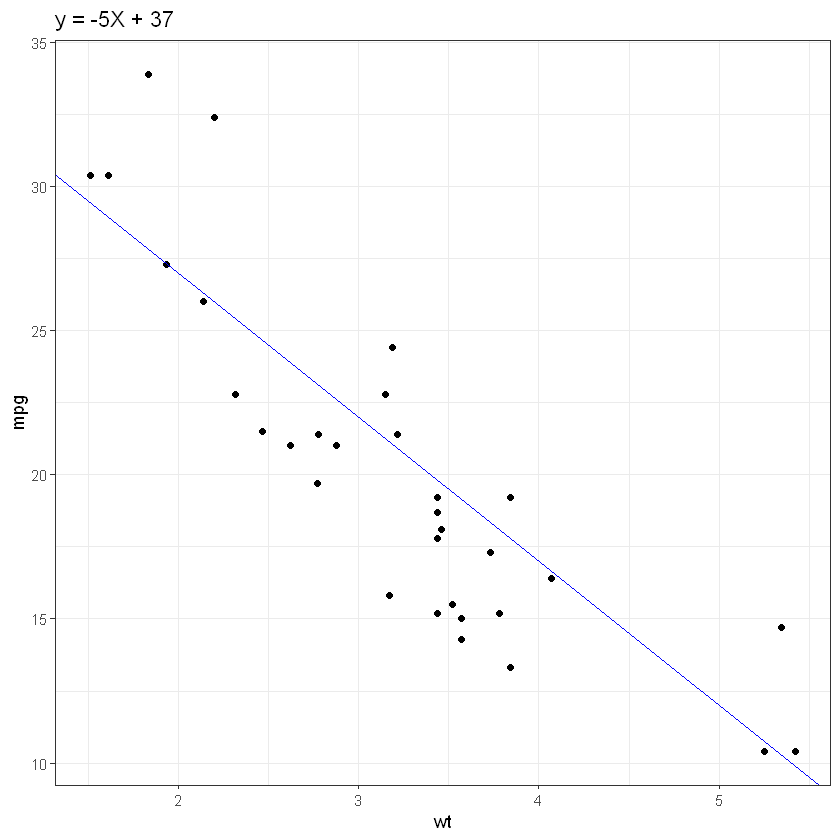

In [61]:
sp + geom_abline(intercept = 37, slope = -5, color="blue")+
labs(title = "y = -5X + 37")

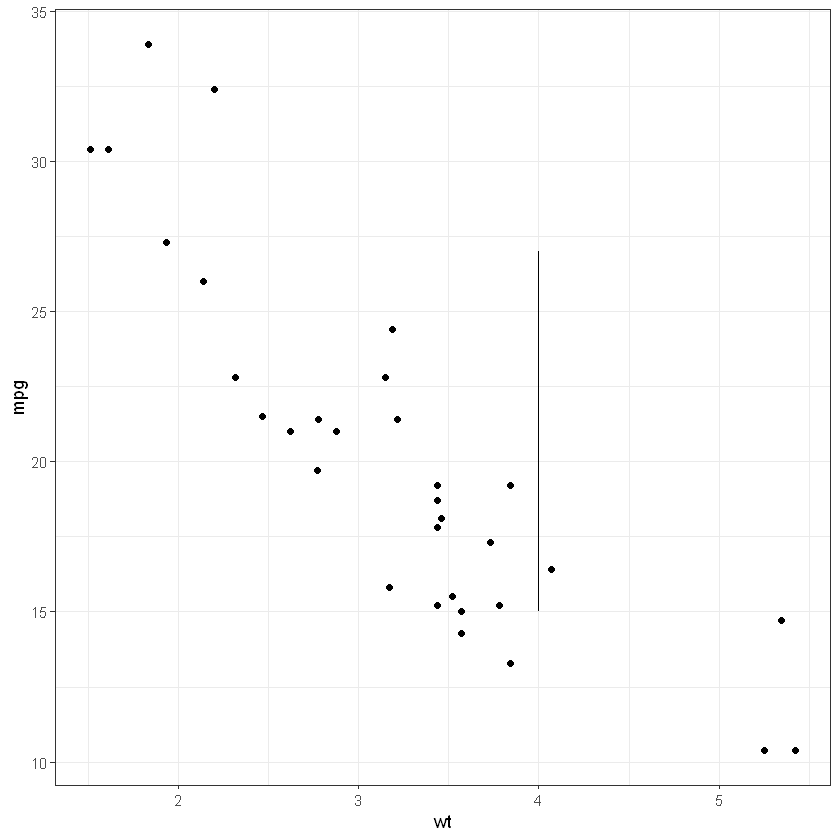

In [62]:
# Add a vertical line segment from
# point A(4, 15) to point B(4, 27)
sp + geom_segment(x = 4, y = 15, xend = 4, yend = 27)

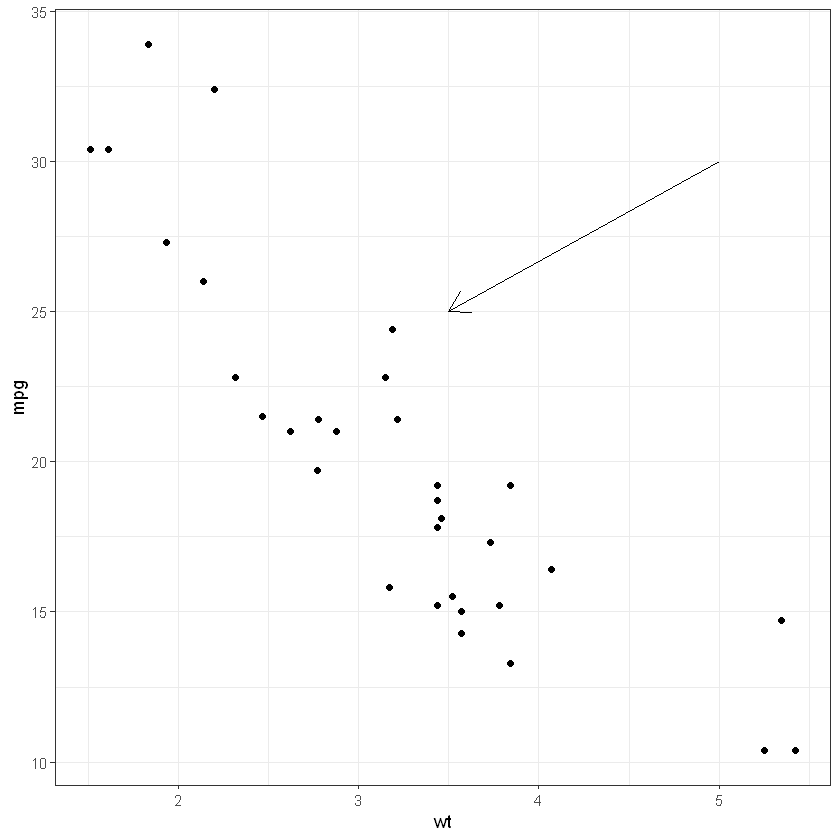

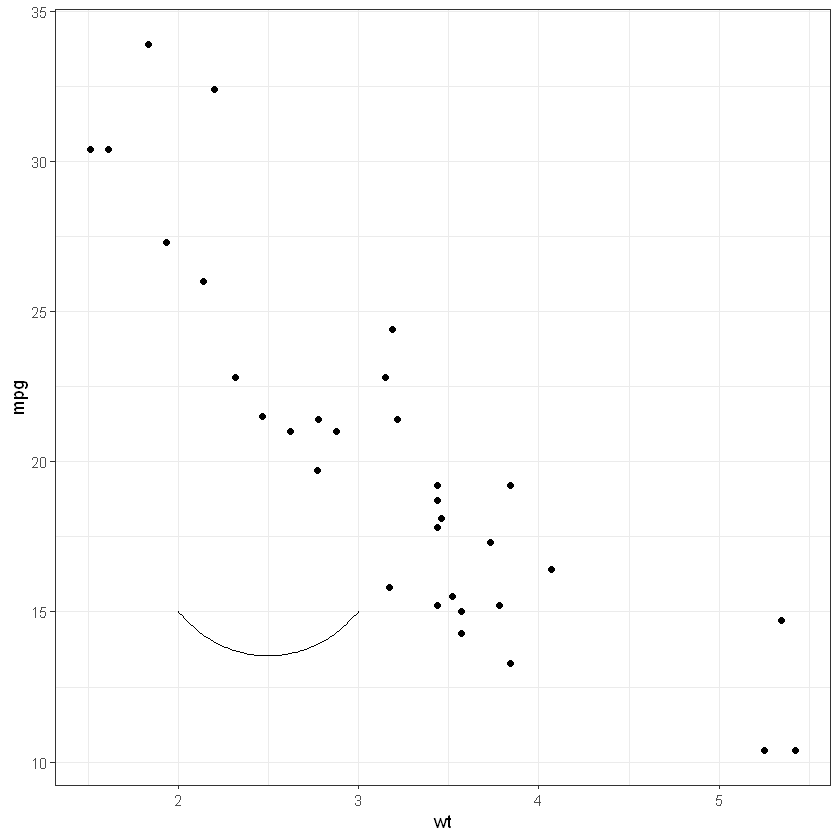

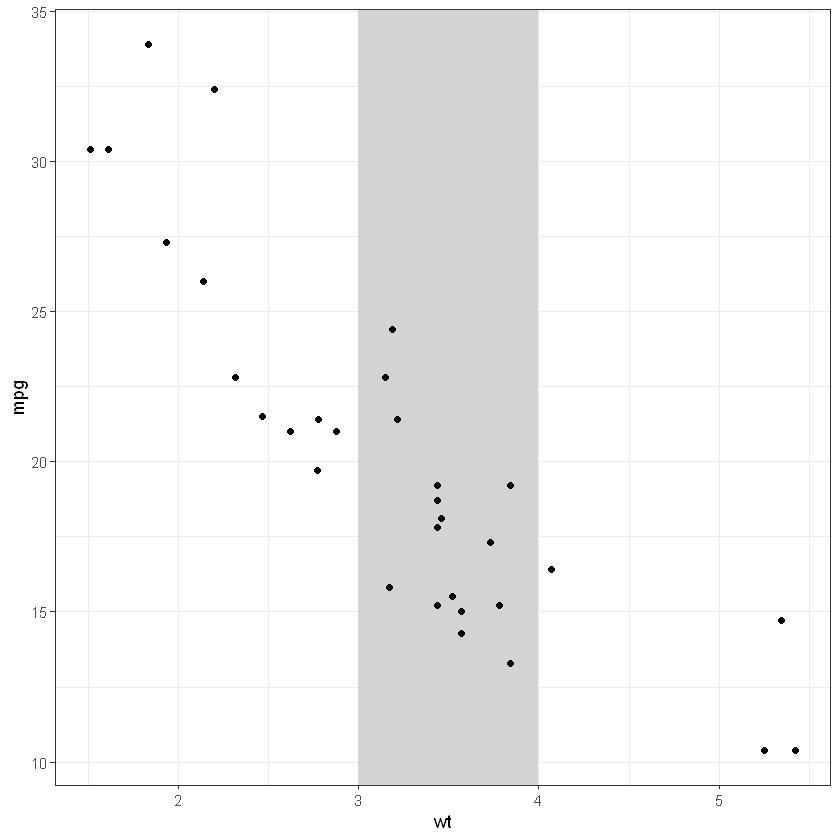

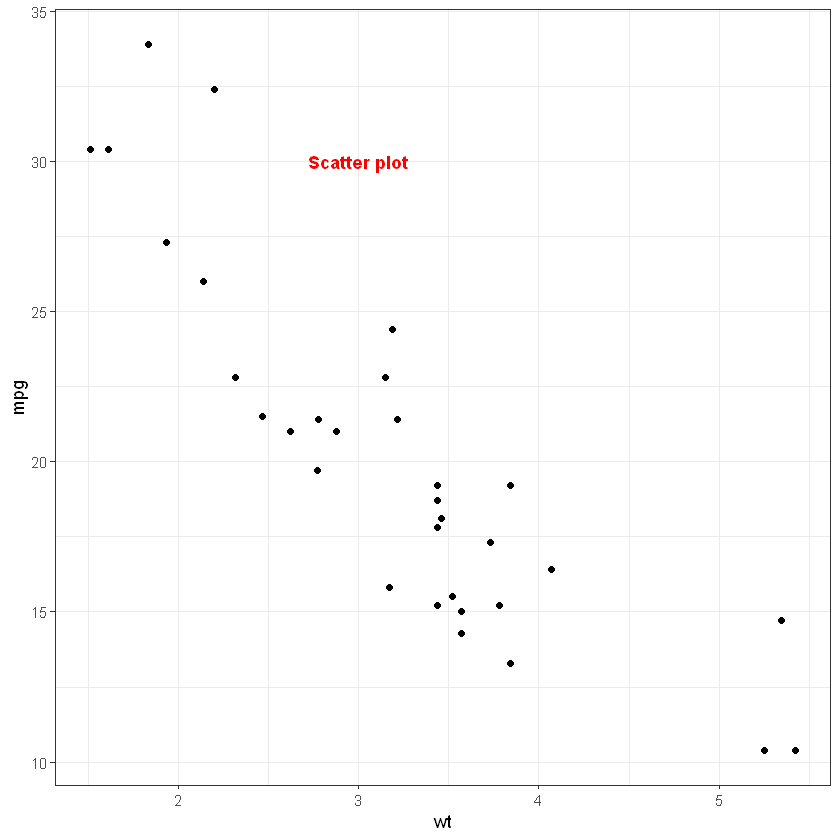

In [66]:
# Add arrow at the end of the segment
require(grid)
sp + geom_segment(x = 5, y = 30, xend = 3.5, yend = 25,
arrow = arrow(length = unit(0.5, "cm")))
# Add curves
sp + geom_curve(aes(x = 2, y = 15, xend = 3, yend = 15))
# Add rectangles
ggplot(data = mtcars, aes(x = wt, y = mpg)) +
geom_rect(xmin = 3, ymin = -Inf, xmax = 4, ymax = Inf,
fill = "lightgray") +
geom_point() + theme_bw()

# Add text at a particular coordinate
sp + annotate("text", x = 3, y = 30,
label = "Scatter plot",
color = "red", fontface = 2)

In [69]:
tidyverse_update()

All tidyverse packages up-to-date
